# Plotting with Babypandas

A picture is worth a thousand words, and that's doubly true in data science. Remember that data science often involves finding *trends* and *associations* between variables. It can be hard to spot these trends when the data is presented in the form of a table, but easy when we're able to *visualize* the data as a plot. Luckily, babypandas makes it easy to generate plots, as we'll now see.

## A new dataset: `climate.csv`

In this chapter, we'll be working with `climate.csv`, a data set compiled from a number of queries from the NOAA (National Oceanic and Atmospheric Administration) website.

```{margin}
Citation:
> NOAA National Centers for Environmental information, Climate at a Glance: Regional Time Series, published July 2020, retrieved on July 21, 2020 from https://www.ncdc.noaa.gov/cag/
```

In [39]:
import babypandas as bpd
import numpy as np

climate = bpd.read_csv('../../data/climate.csv')

This table contains monthly climate data for several regions of the U.S., dating back to 1898:

In [40]:
climate

,year,month,region,temperature,rainfall,zndx
0,1898,1,Northeast Climate Region,21.7,4.56,2.41
1,1898,2,Northeast Climate Region,24.8,3.60,1.69
2,1898,3,Northeast Climate Region,38.0,2.87,-1.55
3,1898,4,Northeast Climate Region,41.2,3.24,0.14
4,1898,5,Northeast Climate Region,55.3,4.12,0.45
...,...,...,...,...,...,...
13171,2019,8,West Climate Region,75.2,0.15,-1.09
13172,2019,9,West Climate Region,65.9,0.68,0.54
13173,2019,10,West Climate Region,53.3,0.14,-1.72
13174,2019,11,West Climate Region,48.3,1.35,-1.39


The columns **temperature**, **rainfall**, and **zndx** are the average temperature in degrees Fahrenheit, total rainfall in inches, and the Palmer Z Index for that specific year/month/region, respectively. I don't know about yours, but my kindergarten didn't teach the Palmer Z Index; it turns out that it measures drought-like conditions. If the Z Index is a large negative number, that means there is a severe drought.

## Categorical vs. Numerical Data

Data comes in different forms -- choosing the right type of visualization depends on understanding the form that our data takes. Two of the most common forms that data comes in are *categorical* and *numerical*. We'll defined these in a moment, but first we need some new terminology.

An {dterm}`individual` (or *instance*) is a particular person/place/thing for which data has been collected. Usually, each *row* of our dataframe corresponds to a unique individual.

A {dterm}`variable` (or *feature*) is a property that is recorded for each individual. For example, the *temperature* is a variable in our new data set, as is the month. Usually, each *column* of our DataFrame corresponds to a different variable.

```{margin}
The terms *instance* and *feature* are more common in the machine learning literature.
```

A {dterm}`numerical variable` is one that we predominantly treat as a number -- we frequently perform arithmetic with these variables. Intuitively, the *temperature*, *rainfall*, and *zndx* variables are all numerical. A {dterm}`categorical variable` is one that is one that takes only a small number of discrete values; it represents a *category*. For instance, the *region* variable is categorical, with each region being a different category.

These definitions are not as rigid as they might seem. Take, for instance, the *month* variable. Is it numerical or categorical? On one hand, it is a categorical variable, since there only 12 values that it can take; each month is its own category. On the other hand, it is numerical -- we can do math with months, such as when we subtract 4 from 12 to find the number of months between March and December. Of course, all of this holds true for the *year* variable, too.

There is no contradiction here: *categorical* and *numerical* are not mutually exclusive. Sometimes we treat the month as a category, and in that moment the variable is categorical. But other times we treat it like a number, and so it becomes numerical.


```{margin}
Some people might disagree that the *year* can be a numerical variable. But it certainly makes sense to treat the year as a number, such as when we calculate the average year in which everyone in a room was born.
```


Also note that a variable's *type* does not necessarily tell us whether it is categorical or numerical. The *month* variable here is certainly stored using Python `int`s, but it is arguably categorical. Another example is if we were to rename the climate regions using numbers: region 1, region 2, and so forth. Although we would be storing the region as an `int`, the variable is clearly categorical.

How do we see all of the values that a categorical variable can take? Printing out the table isn't useful unless there are only a few rows, as *babypandas* unhelpfully hides most of the table from us. Instead, we can ask for the unique values in a column with the `.unique()` method. For instance, here are all of the unique climate regions in our data set:

In [46]:
climate.get('region').unique()

array(['Northeast Climate Region', 'Upper Midwest Climate Region',
       'Ohio Valley Climate Region', 'Southeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'South Climate Region', 'Southwest Climate Region',
       'Northwest Climate Region', 'West Climate Region'], dtype=object)

```{tip}
Questions about your data set should also be looked up online! Effective data exploration revolves around quickly becoming an semi-expert in the domain of the data set.
```

## Chart types

There are many different types of visualizations, from pie charts to word clouds. In this textbook, we'll mostly focus on the following four: scatter plots, line graphs, bar charts, and histograms. Histograms are perhaps the *most* important of these for our purposes, and probably the type of visualization that you're least familiar with. We'll be using histograms quite frequently in the rest of this textbook, so it will pay dividends to get to know them well.

Which of these four visualizations is the correct one for our purposes depends on the form that our data takes (numerical vs. categorical), as well as our goals for visualizing the data. Informally, here's how each plot type is used:

- scatter plot: identify associations between two numerical variables
- line graph: identify trends in one numerical variable as another increases. often used to see trends over time.
- bar chart: visualize the distribution of a *categorical* variable
- histogram: visualize the distribution of a *numerical* variable

Babypandas makes it easy to produce any of these chart types. In fact, we only need to learn one new method, the `.plot` method.

## Introduction to proportions

One quick way to explore our data is to see how much of the data satisfies a certain condition.

Say we are curious -- for the sake of exploration -- about how many of reported temperatures were at or below the freezing point (32 degrees Fahrenheit). We already know how to perform a query to only get the rows where this is true.

In [4]:
freezing = climate[climate.get('temperature') <= 32]

And we can use `.shape[0]` to find out how many rows are in this selection.

In [5]:
freezing.shape[0]

2062

That doesn't seem so useful. Is 2062 big or small? Is it closer to half of our data set, or less than a single percent?

A raw count, like 2062, isn't insightful unless we know what we're comparing it against!

Fortunately, we can *make* it insightful by dividing it by the number of rows in our full data set.

In [6]:
prop_freezing = freezing.shape[0] / climate.shape[0]
prop_freezing

0.15649666059502126

The result is called a {dterm}`proportion`. A proportion is a way of expressing the fraction of the total that satisfies a condition -- and they really do come from fractions!

When someone asks for the "proportion of ...", they're wondering what fraction of data satisfies the condition they're about to propose.

For example, if we had four data points and only one of them was below freezing, we'd consider the *proportion of points below freezing* to be $\frac{1}{4}$ or $0.25$.

Notice that you can turn this into a percent by just multiplying it by 100. So out of our full data set, roughly $0.156 \times 100\% = 15.6\%$ of the recorded temperatures were at or below freezing (brrrrr).

What proportion of recorded temperatures do you think were above freezing?

In [7]:
not_freezing = climate[climate.get('temperature') > 32]
prop_not_freezing = not_freezing.shape[0] / climate.shape[0]
prop_not_freezing

0.8435033394049788

The final important observation we need to make is that the proportion of points that *do* satisfy a condition and the proportion of points that *don't* satisfy that condition will add up to one. And, since we're just calculating the size of a subset of our data, proportions will *always* be between zero and one.

```{margin}
...unless there's one of those pesky floating point errors! Then the opposite proportions might add up to slightly more or less than one.
```

In [8]:
prop_freezing + prop_not_freezing

1.0

That's all on proportions for now, but don't worry! We'll work with proportions again in the future.

## Your first chart

There's an age-old-addage that "a picture is worth a thousand words" -- the same often holds true for data science!

Throughout the exploration process, we'll be relying on charts to help us visualize and ultimately understand the data. While Python has many libraries that can create charts, Babypandas has the capability built in by using the `.plot()` method. With this method, we can create many types of charts -- including some you may be familiar with like bar charts and line charts, as well as others like histograms and scatter plots.

The general syntax to create a chart using Babypandas is:
```html
<table>.plot(kind='<chart_type>', x='<column_name>', y='<column_name>')
```

If the plot uses two features, then *x* will be on the horizontal axis and *y* will be on the vertical axis -- we'll see this momentarily. If the chart only needs a single feature, then only *y* needs to be specified.

To actually understand what's going on, let's try making our first chart. Below we define a example table of ice cream cones, along with the number of cones sold and a yumminess score (out of 10) for each flavor.

In [9]:
icecream = bpd.DataFrame().assign(
    Flavor=['Chocolate', 'Vanilla', 'Strawberry'],
    Cones_Sold=[7, 5, 4],
    Yumminess=[8, 9, 2]
)
icecream

,Flavor,Cones_Sold,Yumminess
0,Chocolate,7,8
1,Vanilla,5,9
2,Strawberry,4,2


We can use a {dterm}`bar chart` to compare the number of cones sold of each flavor. Since we're interested in seeing how the number of cones sold changes as a result of the flavor changing, we specify *x* as Flavor, and *y* as Cones Sold.

In the resulting chart, each flavor will have its own bar, and the height of the bar corresponds to the value of cones sold -- so in this case, the bar for Chocolate is 7 units long since there were 7 chocolate cones sold, but only 4 units long for Strawberry since there were 4 strawberry cones sold.

```{margin}
Try opening the interactive version of this page and seeing what other charts you can create by changing the `kind`, `x`, and `y` arguments.
```

<AxesSubplot:xlabel='Flavor'>

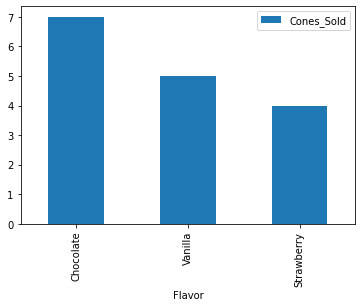

In [10]:
icecream.plot(kind='bar', x='Flavor', y='Cones_Sold')

You've done it! We made a chart from a table. Perhaps you're already getting some ideas for how useful these charts can be -- read on to see just how much we rely on them while exploring our data.

## Distributions

As you work with data scientists and statisticians throughout your life, you'll often hear people asking about the {dterm}`distribution` of a feature.

This generally boils down to answering three important questions about a feature:
1. What is a typical value for this feature?
2. What range of possible values would be expected?
3. Are we more likely to see high values within that range? Low values? Both high values *and* low values, but not values in the middle?

```{margin}
Technically, you *can* describe the shape using measurements such as **skewness** and **kurtosis** -- you'll learn about these in Math 189 -- however it's considerably more challenging to *interpret* these values as opposed to using a chart.
```

Well, the first two seem pretty approachable through metrics that we already know how to calculate -- such as using the mean of a feature to find the typical value, or calculating the min and max to get a range of possible values. But the third question seems a lot more challenging to represent just by using numbers.

But we have the power of charts! And we can use a specific type of chart, called a histogram, to answer all three of those questions.

### Histograms

A {dterm}`histogram` is a type of chart that gives us a visual representation of the distribution of a numerical feature by expressing how many times the data shows up in a given range.

We can create a histogram of our recorded temperatures by simply specifying `kind='hist'` and setting `y` to the name of the column we're intreseted in. This example also specifies two additional arguments that may seem mysterious, but soon you'll know what they do!

<AxesSubplot:ylabel='Frequency'>

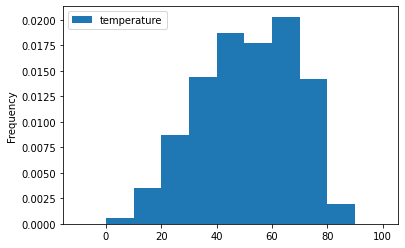

In [11]:
climate.plot(kind='hist', y='temperature',
           bins=np.arange(-10, 101, 10), density=True)

You can think of a histogram as similar to a bar chart in concept. Each bar corresponds to a range of values called a **bin**, for example at the very left of the chart there is a bin from zero degrees to ten degrees. The height of each bar corresponds to how much of the data falls into that bin.

Important to note: the bins of a histogram include the lower number, but *exclude* the higher number. Also, we'll usually express these bins using the mathematical notation for intervals so the bin containing temperatures from 0 degrees to 9.99999... degrees is written as $[0, 10)$. This means that if a temperature was equal to 10, it would show up in the bin *starting* with 10, e.g. $[10, 20)$.

![histograms](../images/histogram-annotation.jpg)

All sorts of information about our data can be gleaned from just the histogram. For example, in the histogram above we can tell that the bin with the greatest frequency of values was $[60, 70)$ since that bar is the highest, whereas no data fell in the bin $[90, 100)$ since that bar doesn't show up at all! By thinking about where the balance point of the shape is, we can find the mean of the feature. By looking at the extremes of our histogram we know that our temperature data is never greater than 90, and never less than 0. But, since the bars at the extremes are short, we know that it's more likely for us to find temperatures between 20 and 80 degrees. And, we can notice that the mass of the histogram bunched up towards the higher end but stretched out on the low end, so it's more likely for us to see a high value but every once in a while we might find a *very* low value.

### Setting the level of detail

You'll notice that in our example above, we also specified a `bins` argument. This argument allows us to specify how many bins we want our data split up into, or even allows us to set the range for each bin manually. But why does it matter?

The number of bins we use to draw our histogram has a intrinsic effect on the level of detail of our histogram. It's probably best to see this point illustrated, so below you can see the histogram for the same data above, but animated as our number of bins changes from one-hundred down to two.

![The level of detail decreases, but it becomes easier to see trends](../images/histogram-detail.gif)

Notice that as the number of bins decreases, each bin gets wider and our histogram appears to smooth out -- until a point at which decreasing the number of bins makes the shape *more* choppy. With too many bins it looks noisey and is hard to find a smooth pattern. With too few bins our view becomes overly simplified can obscure patterns.

Each frame of the animation above was made by plotting with `bins` set to the integer number of bins we wanted to split the data into.

<AxesSubplot:ylabel='Frequency'>

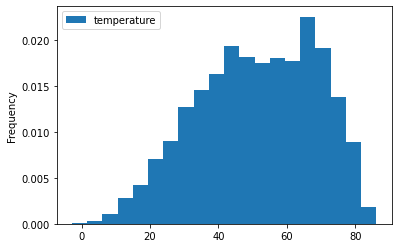

In [12]:
climate.plot(kind='hist', y='temperature', bins=20, density=True)

By default, the bins will collectively range from the minimum value of the feature to the maximum value. So, we can calculate the width of each bin as
$$
\mathrm{width} = \frac{\max - \min}{\text{number of bins}}
$$

But you may notice the problem with this -- it's pretty hard to tell which values a particular bin covers! For example, what values would fall into the tallest bin? Could you tell without needing to do calculations or stare tediously at the horizontal axis?

The solution to this issue is but setting our own custom bins. This was done in the example above, and is accomplished by setting `bins` equal to a {dterm}`sequence` of start-points for our bins. The very last entry of the sequence is the end-point of the last bin (exclusive, remember!).

You could pass in a list, requiring you to manually type each interval. E.g. we could create the bins $[-10, 15)$, $[15, 40)$, $[40, 65)$, $[65, 90)$ by writing the following:

<AxesSubplot:ylabel='Frequency'>

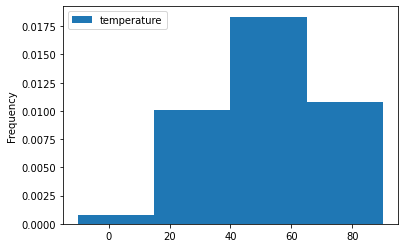

In [13]:
bins = [-10, 15, 40, 65, 90]
climate.plot(kind='hist', y='temperature', bins=bins, density=True)

But, recall from {doc}`../02-data_sets/arrays` that we can make better use of a *range* here. By passing in the range from -10 to 90+ with a step size of 25, we achieve the same result. Just be careful to remember that histogram bins *and* ranges are *both* exclusive on the upper bound. So, if we want our bins to end with $[65, 90)$, then the endpoint of our range must be greater than 90! A common technique to make sure your desired endpoint is included within a range is to add the step size to the value.

<AxesSubplot:ylabel='Frequency'>

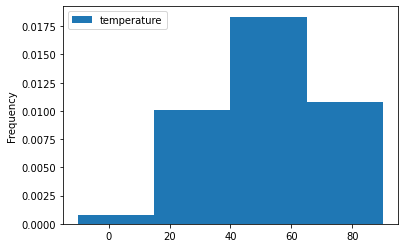

In [14]:
bins = np.arange(-10, 90+25, 25)
climate.plot(kind='hist', y='temperature', bins=bins, density=True)

```{tip}
The upper-bound-exclusionary nature of histogram bins and ranges can make it confusing to know if you're accidentally cutting of data. Feel free to evaluate the range in its own cell, and make sure that the last value in the sequence is greater than the maximum value of the feature.
```

Conveniently, if we ignore the `bins` argument then a bin count will automatically be chosen for us. Honestly the automatic count *usually* results in an appropriate level of detail! But not always. It's important to know how to alter the bins if we want to explore our data more diligently.

For the rest of this section, we'll use some custom bins to make things easier for ourselves.

In [15]:
nice_bins = np.arange(-10, 100+10, 10)

### The math behind histograms

Often, we use histograms to quickly get an intuition about the *shape* of our data. However, if we study the numbers on the vertical axis a bit closer we can extract important information about the proportion of data falling in each bin. We just need to make sure we set `density=True` when we call the plotting method.

Recall from our introduction earlier in this chapter that proportions are almost always more insightful than raw counts. Unfortunately, the default behavior of the plotting method is to plot a histogram of -- you guessed it -- raw counts (yuck!).

<AxesSubplot:ylabel='Frequency'>

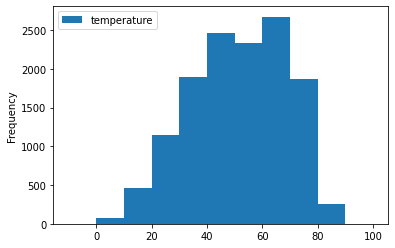

In [16]:
climate.plot(kind='hist', y='temperature', bins=nice_bins)

Notice that the shape of our plot remains the same, only our vertical axis changes.

<AxesSubplot:ylabel='Frequency'>

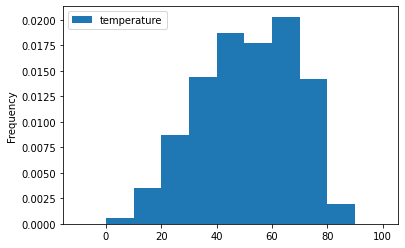

In [17]:
climate.plot(kind='hist', y='temperature', bins=nice_bins, density=True)

In [18]:
(0.0175 + 0.02 + 0.014 + 0.002)*10

0.535

When `density=True`, the *proportion* of data that falls into a given bin is equal to the *area* of that bin. This means that in additional to providing us with a general intuition for how data falls within a certain range of values, the histogram also allows us to find this information mathematically! The formula becomes,

$$
\text{proportion of data in bin} = \text{bin height}\times\text{bin width}
$$

Let's try it out. We've noticed that temperatures show up with the highest frequency in the bin $[60, 70)$, let's find the proportion that fall in that range.

Since the height of that bin is just over $0.02$, we calculate the proportion of data in the range $[60, 70)$ as

$$
\begin{aligned}
\text{proportion in [60, 70)} &\approx 0.02 \times 10 \\
&= 0.2
\end{aligned}
$$

That's that's at least a fifth of our entire data set!

To get a sense of the proportion of data across multiple bins, say temperatures from 50 degrees all the way to 90, we can simply add the proportion of each individual bin! Notice that if the bins are all equal in width, we can add up all the heights and *then* multiply, since multiplication distributes over addition.

$$
\begin{aligned}
\text{proportion from 50 to 90} &= \text{pr [50, 60) + $\cdots$ + pr [80, 90)} \\
&\approx (0.0175 + 0.02 + 0.014 + 0.002)(10) \\
&= 0.535
\end{aligned}
$$

Hmmm... that's pretty close to $50\%$... the median of the data set must be somewhere nearby.

What would happen if we added the areas of all bins? Turns out, we'll arrive at a sum of $1.0$. Indeed, the histogram can confirm the fundamental truth that 100% of our data falls within the extent of *all* of our bins!

Note that in our calculations, we took a bit of liberty in *estimating* the heights of the bins, so if you were to try adding the areas in practice you may arrive at a number slightly more or less than $1.0$ due to errors in approximation -- and that's totally fine! If we wanted to be completely accurate about the proportion of data in each range, we would compute it directly. But the point of a histogram is to make initial exploration and basic calculations quick and easy, so we can rest easy knowing that we're working with estimates.

**A note about density**

It would be rude to move on without giving some indication of why the term 'density' is used, or without discussing how the heights are calculated in the first place!

Technically, the height of each bin actually represents the 'density' of data in that interval.

You can think of this 'density' the same way you would think of density in a physics or chemistry class -- it's a ratio between how much stuff you have versus how much space it's contained in.

Mathematically, the bin heights are calculated as

$$
\text{bin height} = \frac{\text{proportion of data in bin}}{\text{bin width}}
$$

See how we're able to use bin height and bin width to reverse the calculation and arrive at the proportion?

### Categorical distributions

If we're working with a categorical variable it's important to look at the frequency of the categories. For this, we can use a bar chart in conjunction with `.groupby` and `.count`.

The resulting chart is no longer a histogram since we're no longer working with numerical bins, but the end result is similar: we get a sense of the frequency of different values of the feature. And, similar to the histogram, it is preferrable to work with proportions of frequency instead of raw counts. We accomplish this by performing element-wise division on our counts by the total number of rows in our data.

<AxesSubplot:xlabel='region'>

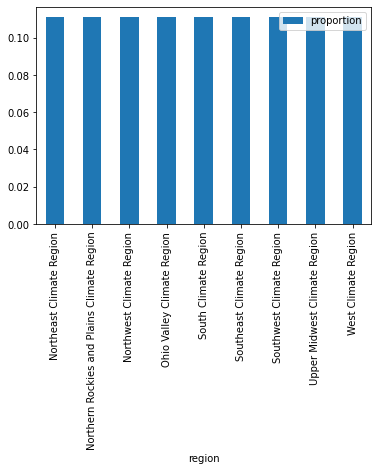

In [19]:
region_counts = climate.get(['region', 'year']).groupby('region').count()

# We can assign a new column as the proportion of each region
region_props = (
    region_counts
    .assign(proportion=region_counts.get('year') / climate.shape[0])
    .drop(columns=['year'])
)

region_props.plot(kind='bar', y='proportion')

Unsurprisingly, the proportion of data is equal for every single climate region. That's what we expect in this situation (each climate region has a measurement for all months from 2000 to 2019). Since we know that we should expect all of the climate regions to have the same proportion of measurements, if the chart showed us that the frequency *wasn't* equal then we'd know something was wrong with our data!

## Trends over time

Since our new data set contains a column to progresses through time (the year), it's possible for us to discover trends in our data. For example, how has average temperature changed over time?

We can group by the year and aggregate using the mean, but once again it's challenging to spot trends just from a series of numbers.

In [20]:
temp_over_time = (
    climate.get(['year', 'temperature'])
    .groupby('year')
    .mean()
)
temp_over_time

,temperature
year,
1898,50.659259
1899,50.170370
1900,51.824074
1901,50.826852
1902,50.623148
...,...
2015,53.503704
2016,54.004630
2017,53.592593


 The human brain is hardwired to detect patterns, but in order to see a pattern amongst numbers, we need to keep all of the numbers in our head. Visualizations like {dterm}`line charts` address this issue!
 
Once again, the column that we want to be the horizontal axis is our table index, so we set *x* to `None` (or don't specify it).

<AxesSubplot:xlabel='year'>

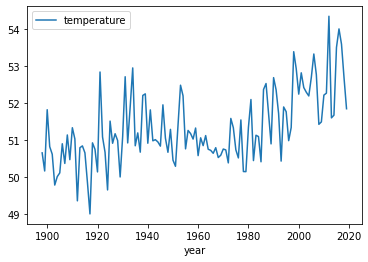

In [21]:
temp_over_time.plot(kind='line', x=None, y='temperature')

A word of caution: notice that that the chart boundaries shrink to fit the data as closely as possible. While this can be nice because it allows us to focus on the changes in the data, it can also be very misleading! For example, the average temperature from 1963 to 1972 never varied by more than a degree, but the line plot still looks very dramatic!

<AxesSubplot:xlabel='year'>

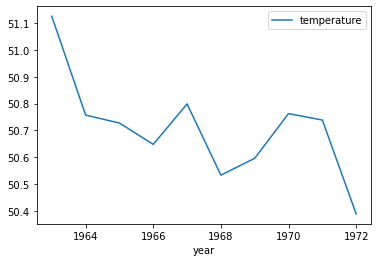

In [22]:
from_63_to_72 = (temp_over_time.index >= 1963) & (temp_over_time.index <= 1972)

temp_over_time[from_63_to_72].plot(y='temperature')

This is another situation where *domain knowledge* is necessary to avoid jumping to false conclusions. How important is a single degree of change in average temperature? We should always be careful not to let charts scare us.

## Comparing groups

We've seen a bar chart as the very first example of a chart in this chapter, and we've seen it again to compare the proportions of categories. In general, {dterm}`bar charts` are used to give *context* when comparing the values assigned to different categories. While sometimes our groups are already separated, like in our very first examples, we also know from our experience with groupby that perhaps the most common way of assigning a value to a category is by using groupby and aggregation!

Anyway, once we have data with a single row per group, the bar chart lets us easily spot disparities.

To illustrate, let's see what the *minimum* reported temperature is for each climate region.

<AxesSubplot:xlabel='region'>

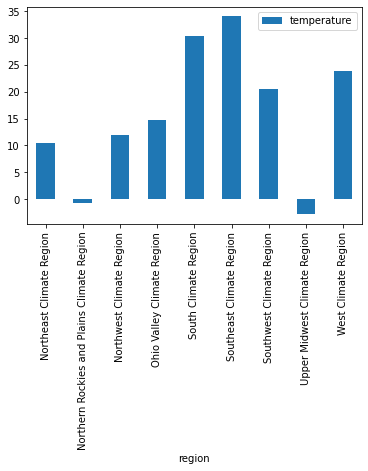

In [23]:
min_temp_by_region = (
    climate.get(['region', 'temperature'])
    .groupby('region')
    .min()
)
min_temp_by_region.plot(kind='bar', y='temperature')

The bar chart highlights a considerable difference between the minimum temperature in the regions. We can quickly pick out the regions with the lowest and highest minimum temperatures (there are even some *negative* temperatures!)... but it's a little challenging to read the labels when they're vertical like that.

There are actually two changes we should consider when making a bar chart. First, we can make the whole chart horizontal by setting `kind='barh'`. Second, we can make it easier to find patterns in the ranking of the regions by first sorting our table, then plotting.

<AxesSubplot:ylabel='region'>

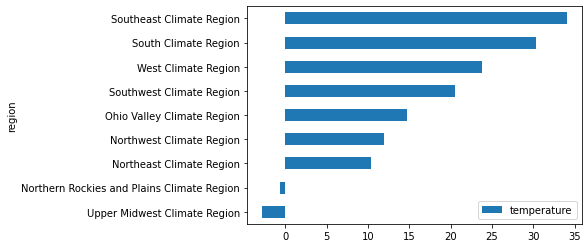

In [24]:
(
    min_temp_by_region
    .sort_values(by='temperature')
    .plot(kind='barh', y='temperature')
)

Now that the bar chart is sorted based on the minimum temperature -- essentially ranking the climate regions -- it becomes much easier for us to spot additional patterns. For instance, did you notice that the regions that contain 'South' have some of the highest minimum temperatures? Also, there's a really big drop between the minimum temperature in the Northeast region to the Northern Rockies and Plains region -- more than a 10 degree difference! I wonder why that is... sounds like some additional domain research is necessary.

## Relationships between features

So far, we've seen charts that let us work with a single feature, charts that let us compare a feature versus time, and charts that let us compare a feature versus a category -- how about comparing a numeric feature against another numeric feature?

The {dterm}`scatter plot` is a fundamental chart which takes in a pairs of values, $x$ and $y$, then plots each pair as a point on a coordinate grid. Our use of the scatter plot is almost always motivated by a core question: *how is the value of $y$ related to the value of $x$?*

Conviently, we still have two more numerical features in the data set that we haven't worked with much: rainfall the the Palmer Z Index (ZNDX). Furthermore, -- unless you've looked it up -- we're not even sure what ZNDX is! How about we use a scatter plot to explore the extent to which our ZNDX feature depends on rainfall.

To do so, we set `kind='scatter'` and specify `x`, `y` as numeric column names.

<AxesSubplot:xlabel='rainfall', ylabel='zndx'>

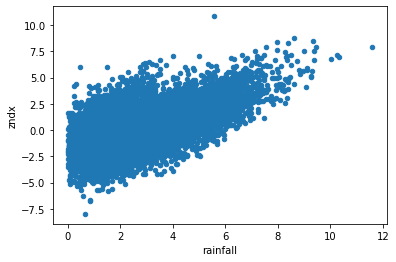

In [25]:
climate.plot(kind='scatter', x='rainfall', y='zndx')

Looks interesting, right? There's a very clear upwards slope to the data -- looks like we found a relationship after all.

In statistics, if we see a pattern in the scatter plot between two features, we consider there to be an {dterm}`association` between the features. In the relationship between rainfall and ZNDX, we see a *positive association*, meaning that as the rainfall measurement increases, we usually see the ZNDX measurement increase, too.

So what's the reason for this relationship? Well, again, domain knowledge is crucial in effective data science, so it's about time we look up what the Palmer Z Index is. Turns out it's a short-term measure of drought versus moisture in a region, where lower values mean less moisture is in the area. So it makes a *lot* of sense for this measurement to depend on rainfall in the area!

On the other hand, if we plot the ZNDX against temperature, we don't see much of an association -- we basically just see a blob.

<AxesSubplot:xlabel='temperature', ylabel='zndx'>

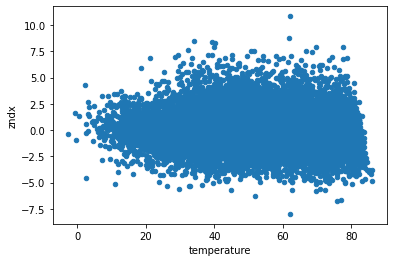

In [26]:
climate.plot(kind='scatter', x='temperature', y='zndx')

If instead we saw a downward slope, then there would have been *negative association* visible... But since that is not the case, in this situation we consider there to be *no association* between ZNDX and temperature.

## Comparing charts

According to [an article by the NOAA](https://www.noaa.gov/news/2019-was-2nd-wettest-year-on-record-for-us), 2019 was the second wettest year in the United States. In contrast, the year 1930 was the start of the 'Dust Bowl' -- a historical period of some of the most severe droughts in the US.

Can we explore how the data recorded during 2019 differs from 1930? To explore this aspect of the data, it'll be useful to know how to compare what the *charts* look like for 2019 versus 1930.

```{margin}
Remember, we can't start a variable name with a number.
```

In [27]:
year2019 = climate[climate.get('year') == 2019]
dustbowl = climate[climate.get('year') == 1930]

### Overlaying scatters, lines, and histograms

How about starting by comparing the scatter plots we just learned about. That way, we can see what the rainfall and drought index look like in the two drastically different years.

To overlay these two plots, we tell Babypandas that the two plots should share the same *axes* (plural of axis). To do this, we assign the first plot to a variable, then when we create the second plot we pass in an additional argument `ax` which references that variable.

Let's see what happens when we do this.

<AxesSubplot:xlabel='rainfall', ylabel='zndx'>

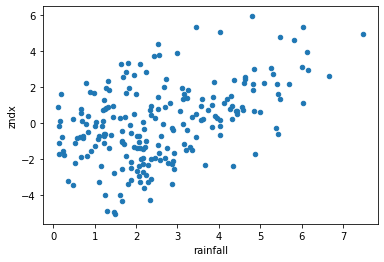

In [28]:
ax = year2019.plot(kind='scatter', x='rainfall', y='zndx')
dustbowl.plot(ax=ax, kind='scatter', x='rainfall', y='zndx')

Uh oh, Python did exactly what we told it to do -- it simply drew the two plots on top of each other! Unfortunately, we have no way to tell which point came from 2019 versus 1930. To fix this, we should introduce two additional arguments: `label` should be set to the name of each group we're plotting, this will show up next to the chart along with a `color` for that group. The color argument can be set to [many things](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), including valid [hex codes](https://www.computerhope.com/htmcolor.htm). Let's set our labels to '2019' and 'Dustbowl' to be descriptive, and for a bit of fun let's set the colors to 'aqua' and 'sandybrown' respectively.

```{margin}
Fortunately, 'aqua' and 'sandybrown' happen to form a decent color palette, but not all colors work well together!

In practice, you should always prioritize *readability* in your charts -- if you choose colors they should have enough visual contrast to easily distinguish and pick up on patterns in the groups.
```

<AxesSubplot:xlabel='rainfall', ylabel='zndx'>

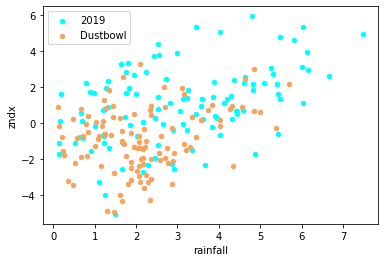

In [29]:
ax = year2019.plot(kind='scatter', x='rainfall', y='zndx',
                   label='2019', color='aqua')
dustbowl.plot(ax=ax, kind='scatter', x='rainfall', y='zndx',
              label='Dustbowl', color='sandybrown')

The same technique can be used to compare most types of charts. We can compare time series data across groups, like the average rainfall over the course of 2019 versus the rainfall over the course of 1930.

<AxesSubplot:xlabel='month'>

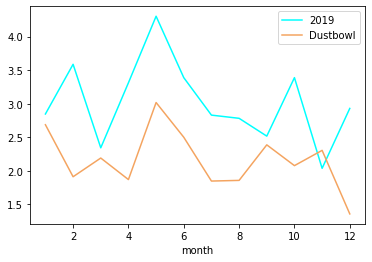

In [30]:
year2019_bymo = year2019.groupby('month').mean()
dustbowl_bymo = dustbowl.groupby('month').mean()

# Remember that our index is now 'month', and our x axis defaults to the index
ax = year2019_bymo.plot(kind='line', x=None, y='rainfall',
                        label='2019', color='aqua')
dustbowl_bymo.plot(ax=ax, kind='line', x=None, y='rainfall',
                   label='Dustbowl', color='sandybrown')

```{note}
Turns out we only *need* to specify color for the scatter plot. The line chart and histogram will automatically use multiple colors when overlaying.
```

And the same technique can be used on the ever-powerful histogram, with one addition: you should also specify an `alpha` argument which determines the opacity of the bars. This allows you to see through a histogram if it happens to cover up the other. We can still set labels and colors as before.

<AxesSubplot:ylabel='Frequency'>

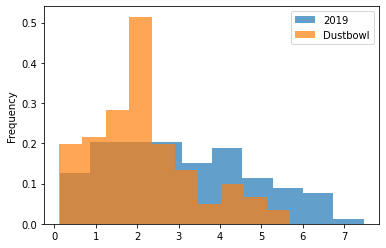

In [31]:
ax = year2019.plot(kind='hist', y='rainfall', density=True,
                   label='2019', alpha=0.7)
dustbowl.plot(ax=ax, kind='hist', y='rainfall', density=True,
              label='Dustbowl', alpha=0.7)

```{note}
Notice that when we're comparing histograms it's *especially* important that we use the `density=True` argument. Otherwise we'd produce a misleading picture since the bin widths (and in many cases the number of elements in each group) are different.
```

### Comparing bar charts

How did the rainfall compare across the climate regions for the different years? We're able to answer this question by comparing bar charts, but unfortunately we can't use the same approach as before. That's the bars would simply be drawn on top of each other and completely overlap!

What would make more sense is to create a bar chart such that the bars for the two groups we're comparing are placed *next* to eachother instead of on top of eachother.

We can accomplish this by creating a table that has a column for both groups we indend to chart, and whose indices are the categories of the bar chart.

In [32]:
year2019_byreg = year2019.groupby('region').mean()
dustbowl_byreg = dustbowl.groupby('region').mean()

In [33]:
combined = bpd.DataFrame().assign(
    rain2019=year2019_byreg.get('rainfall'),
    rain1930=dustbowl_byreg.get('rainfall')
)
combined

,rain2019,rain1930
region,,
Northeast Climate Region,4.137500,2.696667
Northern Rockies and Plains Climate Region,2.040833,1.489167
Northwest Climate Region,2.385000,1.977500
Ohio Valley Climate Region,4.498333,2.520000
South Climate Region,3.371667,2.719167
Southeast Climate Region,4.191667,3.671667
Southwest Climate Region,1.314167,1.238333
Upper Midwest Climate Region,3.361667,2.003333
West Climate Region,1.899167,1.185833


Then, we can plot this new combined table by passing in column names, labels, and colors as a list of desired values for each group.

<AxesSubplot:xlabel='region'>

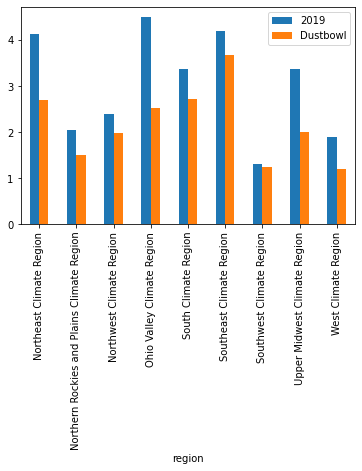

In [34]:
combined.plot(kind='bar', y=['rain2019', 'rain1930'],
              label=['2019', 'Dustbowl'])

As we would expect, the second wettest year in the U.S. got considerably more rainfall in just about every region than one of the driest years in the U.S... except for in the Southwest.

Perhaps this serves as a launching point for further exploration. But for now, let's figure out how to join this climate data with our fire data.